In [38]:
# ADP3 - TENDENCIAS DE VENTAS MINORISTAS

In [39]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 0. VARIABLES CREADAS

In [41]:
# df = data frame original

# 1. LIMPIEZA DE DATOS

## Exploración inicial

In [44]:
df = pd.read_csv('ventas_retail.csv')

In [45]:
print(df.head())

   ID de transacción       Fecha ID de cliente     Género  Edad  \
0                  1  2023-11-24       CUST001  Masculino    34   
1                  2  2023-02-27       CUST002   Femenino    26   
2                  3  2023-01-13       CUST003  Masculino    50   
3                  4  2023-05-21       CUST004  Masculino    37   
4                  5  2023-05-06       CUST005  Masculino    30   

  Categoría de producto  Cantidad  Precio por unidad  Importe total  
0               Belleza         3                 50            150  
1                  Ropa         2                500           1000  
2           Electrónica         1                 30             30  
3                  Ropa         1                500            500  
4               Belleza         2                 50            100  


In [46]:
df.shape

(1000, 9)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID de transacción      1000 non-null   int64 
 1   Fecha                  1000 non-null   object
 2   ID de cliente          1000 non-null   object
 3   Género                 1000 non-null   object
 4   Edad                   1000 non-null   int64 
 5   Categoría de producto  1000 non-null   object
 6   Cantidad               1000 non-null   int64 
 7   Precio por unidad      1000 non-null   int64 
 8   Importe total          1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [48]:
df.isnull().sum()

ID de transacción        0
Fecha                    0
ID de cliente            0
Género                   0
Edad                     0
Categoría de producto    0
Cantidad                 0
Precio por unidad        0
Importe total            0
dtype: int64

In [49]:
df.describe()

,ID de transacción,Edad,Cantidad,Precio por unidad,Importe total
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [50]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)
    print("-" * 50)

Valores únicos en la columna 'ID de transacción':
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  

## Limpieza y transformación de datos

In [52]:
# Transformación columna 'Fecha' a datetime64 para facilitar análisis temporales
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [53]:
df['Fecha'].dtype

dtype('<M8[ns]')

# 2. ANÁLISIS EXPLORATORIO (EDA)

# ¿Cómo influye la edad y el género en los hábitos de compra del cliente?

In [56]:
bins = [15, 25, 35, 45, 55, 65]
labels = ['15-25','26-35', '36-45', '46-55', '56-65']
df['Grupo de edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, include_lowest=True)

In [57]:
gasto_promedio = df.groupby(['Grupo de edad', 'Género'], observed=False)['Importe total'].mean().reset_index()

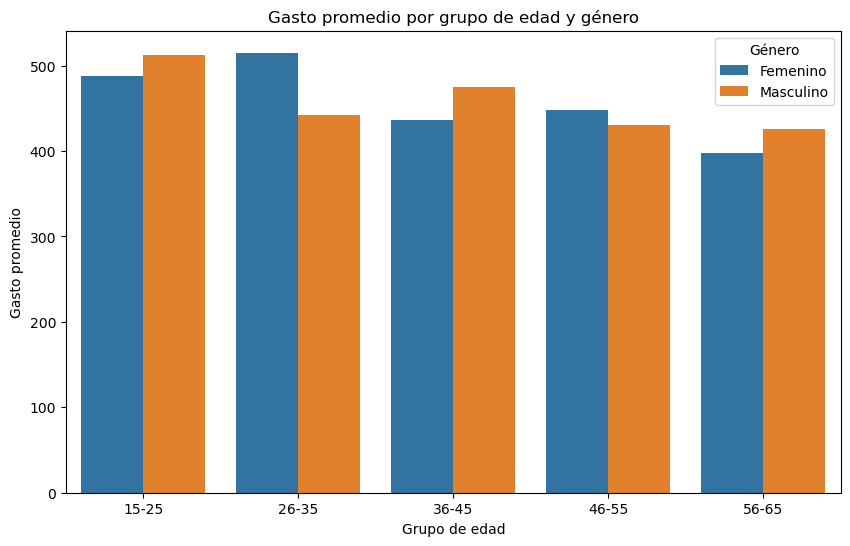

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gasto_promedio, x='Grupo de edad', y='Importe total', hue='Género')
plt.title("Gasto promedio por grupo de edad y género")
plt.ylabel("Gasto promedio")
plt.xlabel("Grupo de edad")
plt.show()

Diferencias por Género:
• En general, observamos que los hombres tienden a tener un gasto promedio 
  ligeramente superior al de las mujeres en la mayoría de los grupos de edad. 
  Esta diferencia es más notable en los grupos de edad de 26-35 y 36-45 años.

Variación del Gasto por Edad:
• El gasto promedio parece variar a lo largo de los diferentes grupos de edad 
  para ambos géneros. El gasto tiende a ser más alto en los grupos de edad 
  más jóvenes (15-25 y 26-35 años) tanto para hombres como para mujeres. 
  Luego, se observa una ligera disminución en el gasto promedio en los grupos 
  de edad de 36-45 y 46-55 años.

Interacción entre Edad y Género:
• Los hombres jóvenes (15-25 y 26-35) muestran un gasto promedio relativamente 
  alto en comparación con las mujeres del mismo grupo de edad. Sin embargo, 
  esta diferencia se reduce en los grupos de edad avanzados.

# ¿Existen patrones de venta diferenciados a lo largo del tiempo?

In [95]:
# Visualización columnas relevantes
df[['Fecha', 'Importe total']].head()

,Fecha,Importe total
0,2023-11-24,150
1,2023-02-27,1000
2,2023-01-13,30
3,2023-05-21,500
4,2023-05-06,100


In [85]:
# Crear una columna de año-mes
df['Año-Mes'] = df['Fecha'].dt.to_period('M')

In [89]:
# Agrupar las ventas totales por mes
ventas_mensuales = df.groupby('Año-Mes')['Importe total'].sum().reset_index()
ventas_mensuales['Año-Mes'] = ventas_mensuales['Año-Mes'].astype(str)
print(ventas_mensuales)

    Año-Mes  Importe total
0   2023-01          35450
1   2023-02          44060
2   2023-03          28990
3   2023-04          33870
4   2023-05          53150
5   2023-06          36715
6   2023-07          35465
7   2023-08          36960
8   2023-09          23620
9   2023-10          46580
10  2023-11          34920
11  2023-12          44690
12  2024-01           1530


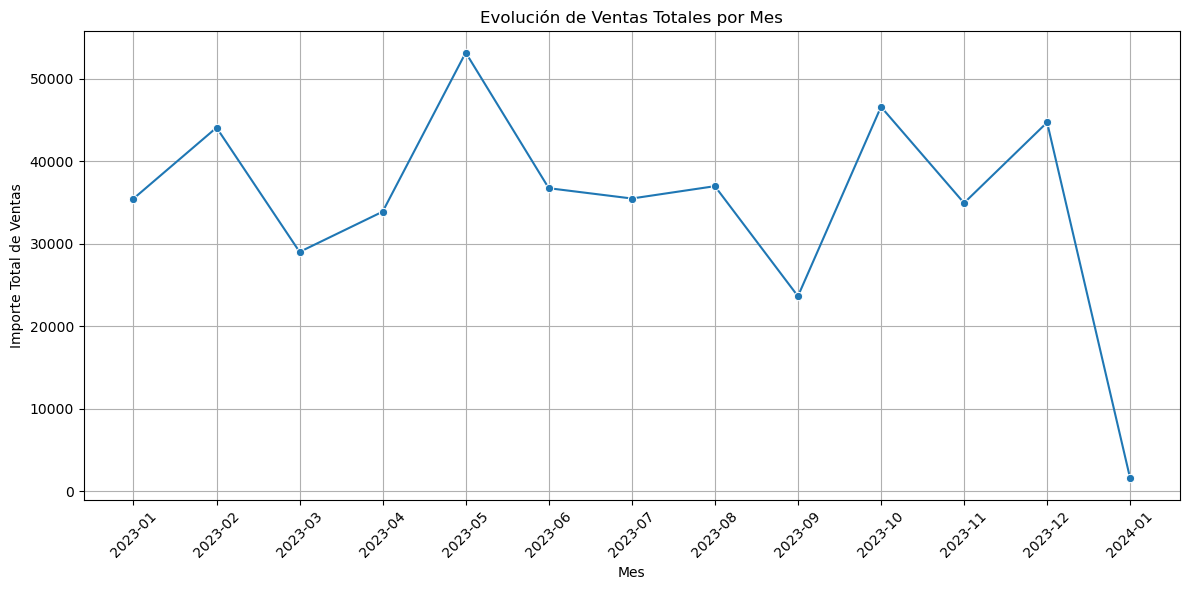

In [91]:
# Visualizar la evolución de las ventas mensuales
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_mensuales, x='Año-Mes', y='Importe total', marker='o')
plt.title('Evolución de Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Importe Total de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

• Variabilidad significativa:
  Las ventas no son constantes a lo largo de los meses. Se aprecian picos y valles, 
  lo que indica una demanda fluctuante.

• Pico pronunciado en mayo de 2023:
  Existe un aumento muy notable en las ventas durante mayo de 2023, alcanzando 
  el punto más alto. Esto podría deberse a factores estacionales, promociones 
  específicas o algún evento particular que impulsó las compras.

• Valle en agosto de 2023:
  Después del pico de mayo, se observa una caída significativa en las ventas en agosto 
  de 2023, llegando al punto más bajo después del inicio del periodo. Esto podría estar 
  relacionado con la temporada de vacaciones, donde la actividad comercial suele 
  disminuir en algunos sectores.

• Recuperación y fluctuación en el último trimestre de 2023:
  Tras el valle de agosto, las ventas muestran una recuperación en septiembre, seguida 
  de fluctuaciones en octubre y noviembre, con un repunte importante en diciembre. 
  Este aumento en diciembre es muy probablemente asociado a la temporada navideña.

• Caída drástica en enero de 2024:
  Se observa una caída muy abrupta en las ventas al inicio de 2024. Esto es un patrón 
  común después del periodo de alta demanda de las festividades de diciembre de Navidad.


# ¿Qué categorías de productos son más atractivas para los clientes?

In [100]:
# Visualización columnas relevantes
df[['Categoría de producto', 'Importe total']].head()

,Categoría de producto,Importe total
0,Belleza,150
1,Ropa,1000
2,Electrónica,30
3,Ropa,500
4,Belleza,100


In [104]:
# Agrupar por categoría de producto y sumar el importe total
ventas_por_categoria = df.groupby('Categoría de producto')['Importe total'].sum().sort_values(ascending=False)
print(ventas_por_categoria)

Categoría de producto
Electrónica    156905
Ropa           155580
Belleza        143515
Name: Importe total, dtype: int64


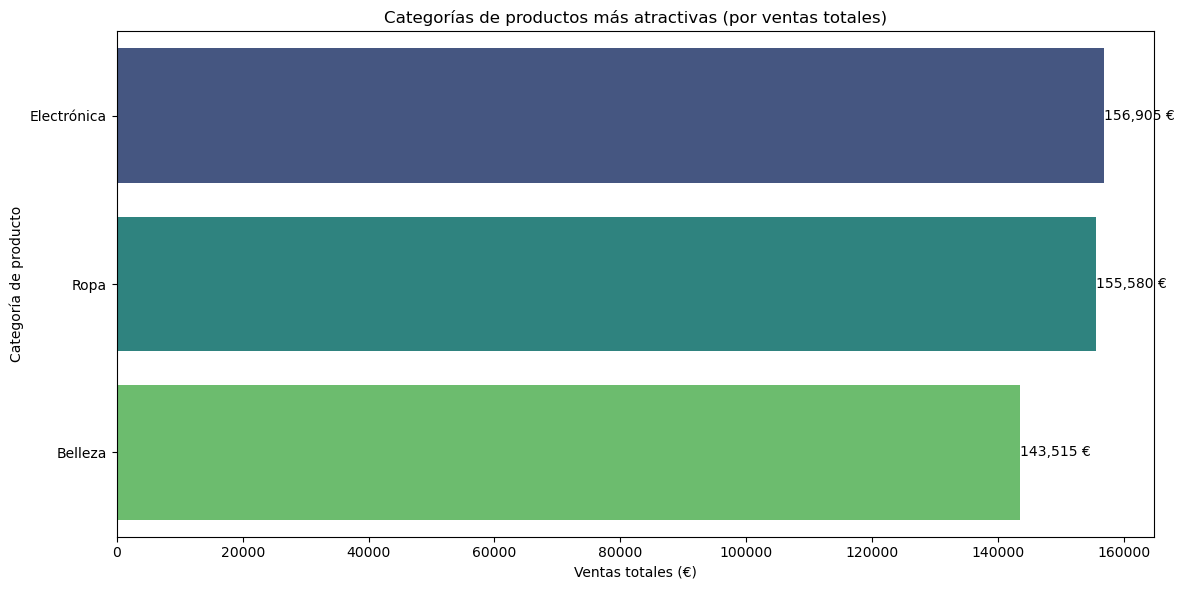

In [110]:
# Visualizar con gráfico de barras
plt.figure(figsize=(12,6))
barplot = sns.barplot(
    x=ventas_por_categoria.values,
    y=ventas_por_categoria.index,
    hue=ventas_por_categoria.index,
    dodge=False,
    palette="viridis",
    legend=False
)

for i, value in enumerate(ventas_por_categoria.values):
    plt.text(value + 5, i, f"{value:,.0f} €", va='center', fontsize=10)

plt.title('Categorías de productos más atractivas (por ventas totales)')
plt.xlabel('Ventas totales (€)')
plt.ylabel('Categoría de producto')
plt.tight_layout()
plt.show()

• Electrónica:
  Esta categoría se destaca como la más atractiva para los clientes, con unas ventas 
  totales de 156.905 €. Es la que genera mayores ingresos en comparación con las otras dos.

• Ropa:
  La categoría de Ropa ocupa el segundo lugar en términos de atractivo para los clientes, 
  con unas ventas totales de 155.580 €. Está muy cerca de la categoría de Electrónica en 
  cuanto a volumen de ventas.

• Belleza:
  Finalmente, la categoría de Belleza es la que genera menos ingresos totales dentro de 
  este conjunto de categorías, con unas ventas de 143.515 €. Aunque es la menos "atractiva" 
  en términos de ventas totales, sigue siendo una categoría importante con un volumen 
  de ventas considerable.

# ¿ Qué relación existe entre la edad, el gasto y la preferencia de productos?

In [116]:
# Visualización columnas relevantes
df[['ID de cliente', 'Importe total', 'Edad']].head()

,ID de cliente,Importe total,Edad
0,CUST001,150,34
1,CUST002,1000,26
2,CUST003,30,50
3,CUST004,500,37
4,CUST005,100,30


In [126]:
# Calcular el gasto total por cliente
gasto_por_cliente = df.groupby('ID de cliente')['Importe total'].sum().reset_index()
print(gasto_por_cliente)

    ID de cliente  Importe total
0         CUST001            150
1         CUST002           1000
2         CUST003             30
3         CUST004            500
4         CUST005            100
..            ...            ...
995       CUST995             30
996       CUST996             50
997       CUST997             90
998       CUST998            100
999       CUST999            150

[1000 rows x 2 columns]


In [144]:
# Calcular el gasto total por grupo de edad (p.ej., rangos de edad)
bins = [20, 30, 40, 50, 60, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60+']
df['Rango de Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)
gasto_por_edad = df.groupby('Rango de Edad', observed=True)['Importe total'].sum().reset_index()
print(gasto_por_edad)

  Rango de Edad  Importe total
0         20-29          97070
1         30-39          96325
2         40-49          93365
3         50-59          98340
4           60+          44815


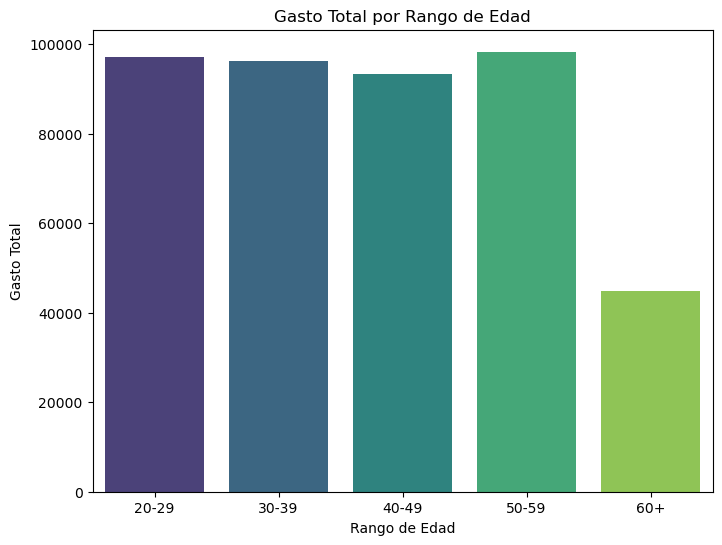

In [150]:
# Visualización de gasto total por rango de edad
plt.figure(figsize=(8, 6))
sns.barplot(x='Rango de Edad', y='Importe total', data=gasto_por_edad, hue='Rango de Edad', palette='viridis')
plt.title('Gasto Total por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Gasto Total')
plt.show()

In [156]:
# Gasto total por preferencia de producto 
gasto_por_producto = df.groupby('Categoría de producto')['Importe total'].sum().reset_index()
print(gasto_por_producto)

  Categoría de producto  Importe total
0               Belleza         143515
1           Electrónica         156905
2                  Ropa         155580


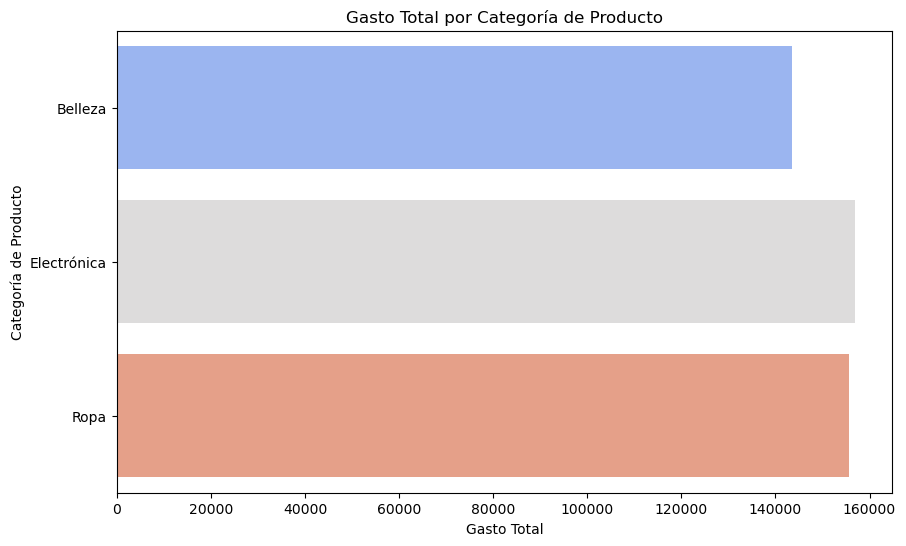

In [162]:
# Visualización de gasto total por categoría de producto
plt.figure(figsize=(10, 6))
sns.barplot(x='Importe total', y='Categoría de producto', data=gasto_por_producto, palette='coolwarm', hue='Categoría de producto')
plt.title('Gasto Total por Categoría de Producto')
plt.xlabel('Gasto Total')
plt.ylabel('Categoría de Producto')
plt.show()

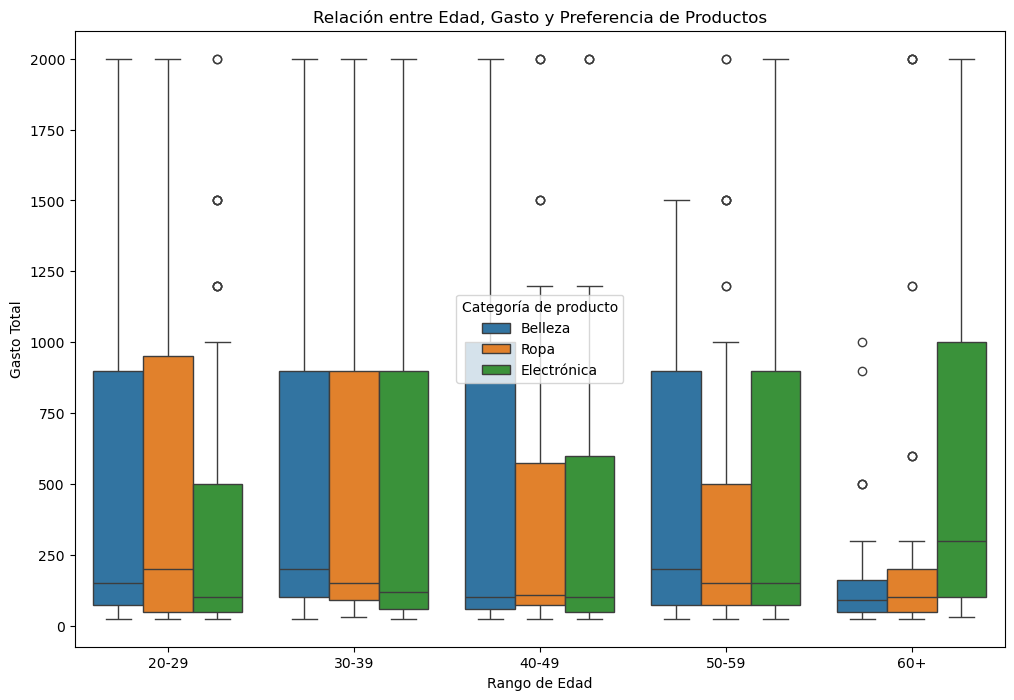

In [164]:
# Relación entre edad, gasto y preferencia de productos
plt.figure(figsize=(12, 8))
sns.boxplot(x='Rango de Edad', y='Importe total', hue='Categoría de producto', data=df)
plt.title('Relación entre Edad, Gasto y Preferencia de Productos')
plt.xlabel('Rango de Edad')
plt.ylabel('Gasto Total')
plt.show()

En resumen, la relación entre la edad, el gasto y la preferencia de productos parece ser la siguiente:

• Los grupos de edad más jóvenes (20-29 y 30-39 años) tienden a gastar más en general 
  y muestran una preferencia marcada por las categorías de Belleza y Ropa. 
  El gasto en Electrónica también es importante en estos grupos.

• El grupo de edad de 40-49 años mantiene un nivel de gasto alto en general, con una 
  ligera disminución en la preferencia por Belleza en comparación con los más jóvenes. 
  Ropa y Electrónica siguen siendo categorías relevantes.

• El grupo de edad de 50-59 años también contribuye significativamente al gasto total, 
  con una notable preferencia por la categoría de Electrónica.

• El grupo de edad de 60+ años presenta el gasto total más bajo en todas las categorías, 
  aunque parece haber cierta preferencia relativa por la Electrónica dentro de su nivel de gasto.

# ¿Cómo cambian los hábitos de compra durante las tendencias estacionales?

In [167]:
# Asignar estación según el mes
def asignar_estacion(fecha):
    mes = fecha.month
    if mes in [3, 4, 5]:  # Primavera
        return 'Primavera'
    elif mes in [6, 7, 8]:  # Verano
        return 'Verano'
    elif mes in [9, 10, 11]:  # Otoño
        return 'Otoño'
    else:  # Invierno
        return 'Invierno'

In [173]:
df['Estación'] = df['Fecha'].apply(asignar_estacion)
print(df[['Fecha', 'Estación']].head())

       Fecha   Estación
0 2023-11-24      Otoño
1 2023-02-27   Invierno
2 2023-01-13   Invierno
3 2023-05-21  Primavera
4 2023-05-06  Primavera


In [177]:
# Calcular el gasto total por estación
gasto_por_estacion = df.groupby('Estación')['Importe total'].sum().reset_index()
print(gasto_por_estacion)

    Estación  Importe total
0   Invierno         125730
1      Otoño         105120
2  Primavera         116010
3     Verano         109140


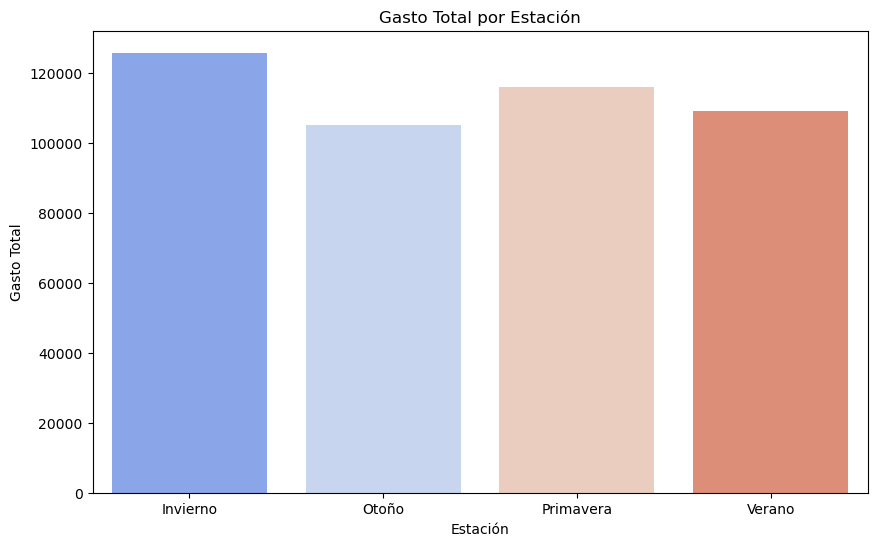

In [181]:
# Visualizar el gasto total por estación
plt.figure(figsize=(10, 6))
sns.barplot(x='Estación', y='Importe total', data=gasto_por_estacion, palette='coolwarm', hue='Estación')
plt.title('Gasto Total por Estación')
plt.xlabel('Estación')
plt.ylabel('Gasto Total')
plt.show()

In [185]:
# Gasto total por estación y categoría de producto
gasto_por_estacion_producto = df.groupby(['Estación', 'Categoría de producto'])['Importe total'].sum().reset_index()
print(gasto_por_estacion_producto)

     Estación Categoría de producto  Importe total
0    Invierno               Belleza          40365
1    Invierno           Electrónica          45610
2    Invierno                  Ropa          39755
3       Otoño               Belleza          31375
4       Otoño           Electrónica          35255
5       Otoño                  Ropa          38490
6   Primavera               Belleza          34900
7   Primavera           Electrónica          34650
8   Primavera                  Ropa          46460
9      Verano               Belleza          36875
10     Verano           Electrónica          41390
11     Verano                  Ropa          30875


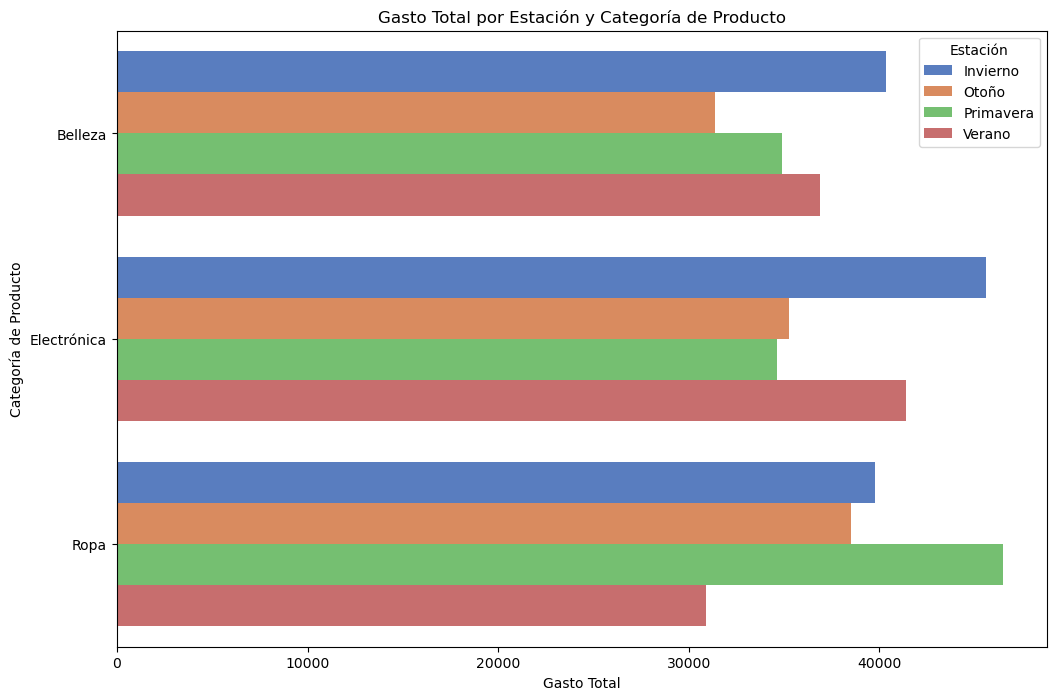

In [187]:
# Visualización de gasto por estación y categoría de producto
plt.figure(figsize=(12, 8))
sns.barplot(x='Importe total', y='Categoría de producto', hue='Estación', data=gasto_por_estacion_producto, palette='muted')
plt.title('Gasto Total por Estación y Categoría de Producto')
plt.xlabel('Gasto Total')
plt.ylabel('Categoría de Producto')
plt.show()

Las tendencias estacionales influyen en los hábitos de compra de la siguiente manera:

• Hay un pico general de gasto en Invierno, probablemente impulsado por eventos específicos 
  y necesidades de la temporada.

• La Ropa experimenta un aumento significativo en Primavera, lo que sugiere una renovación 
  de vestuario para la temporada más cálida.

• La Electrónica tiene una mayor demanda en Invierno y muestra cierta recuperación en Verano.

• La categoría de Belleza parece ser menos sensible a las variaciones estacionales en términos 
  de gasto total.

• Otoño tiende a ser la estación con menor actividad de compra en general para estas categorías.

# ¿Existen comportamientos distintos según la cantidad de productos adquiridos por transacción?

In [209]:
# Categorizar transacciones según la cantidad de productos adquiridos
def clasificar_por_cantidad(cantidad):
    if cantidad <= 2:
        return '1-2 productos'
    elif 3 <= cantidad <= 5:
        return '3-5 productos'
    else:
        return 'Más de 5 productos'

df['Cantidad de Productos'] = df['Cantidad'].apply(clasificar_por_cantidad)
print(df[['Cantidad', 'Cantidad de Productos']].head())

   Cantidad Cantidad de Productos
0         3         3-5 productos
1         2         1-2 productos
2         1         1-2 productos
3         1         1-2 productos
4         2         1-2 productos


In [213]:
# Gasto total por grupo de cantidad de productos
gasto_por_cantidad = df.groupby('Cantidad de Productos')['Importe total'].sum().reset_index()
print(gasto_por_cantidad)

  Cantidad de Productos  Importe total
0         1-2 productos         125855
1         3-5 productos         330145


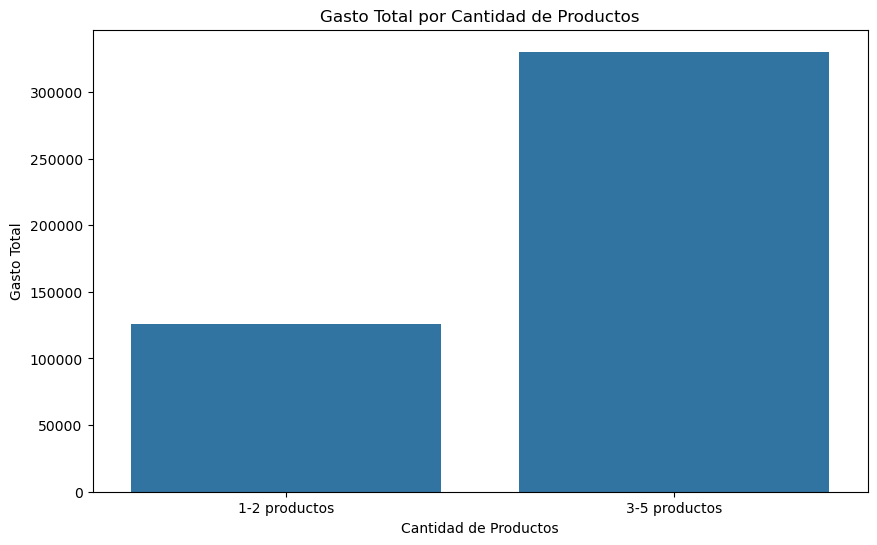

In [217]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cantidad de Productos', y='Importe total', data=gasto_por_cantidad)
plt.title('Gasto Total por Cantidad de Productos')
plt.xlabel('Cantidad de Productos')
plt.ylabel('Gasto Total')
plt.show()

In [221]:
# Gasto total por cantidad de productos y categoría de producto
gasto_por_cantidad_categoria = df.groupby(['Cantidad de Productos', 'Categoría de producto'])['Importe total'].sum().reset_index()
print(gasto_por_cantidad_categoria)

  Cantidad de Productos Categoría de producto  Importe total
0         1-2 productos               Belleza          41660
1         1-2 productos           Electrónica          43410
2         1-2 productos                  Ropa          40785
3         3-5 productos               Belleza         101855
4         3-5 productos           Electrónica         113495
5         3-5 productos                  Ropa         114795


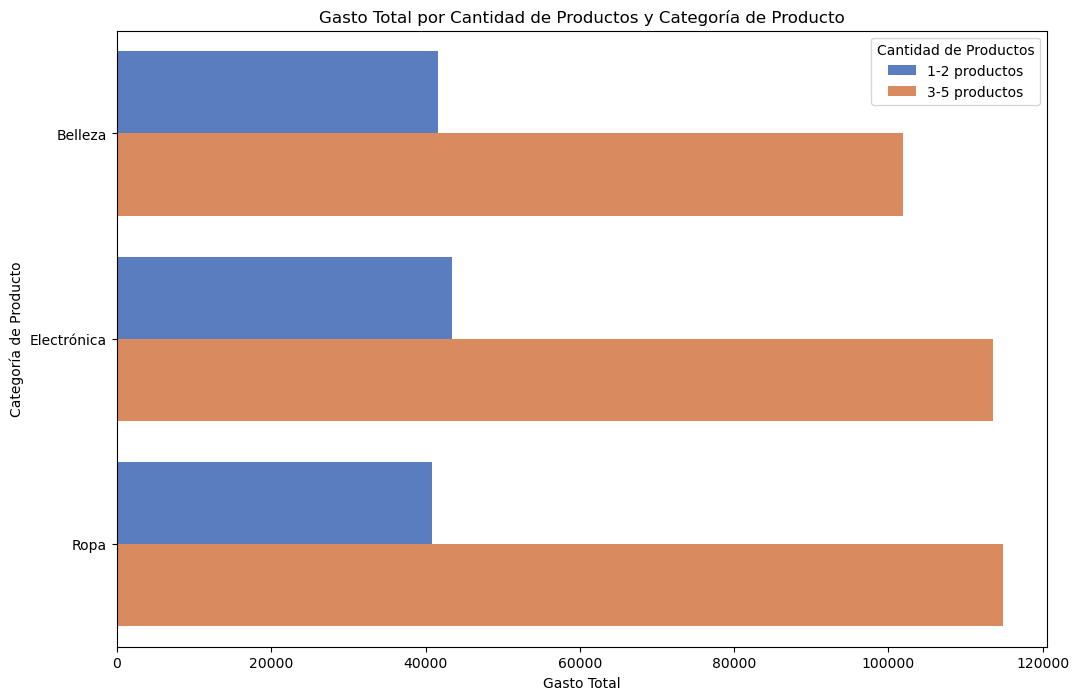

In [223]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importe total', y='Categoría de producto', hue='Cantidad de Productos', data=gasto_por_cantidad_categoria, palette='muted')
plt.title('Gasto Total por Cantidad de Productos y Categoría de Producto')
plt.xlabel('Gasto Total')
plt.ylabel('Categoría de Producto')
plt.show()

In [227]:
# Gasto total por cantidad de productos y género
gasto_por_cantidad_genero = df.groupby(['Cantidad de Productos', 'Género'])['Importe total'].sum().reset_index()
print(gasto_por_cantidad_genero)

  Cantidad de Productos     Género  Importe total
0         1-2 productos   Femenino          65615
1         1-2 productos  Masculino          60240
2         3-5 productos   Femenino         167225
3         3-5 productos  Masculino         162920


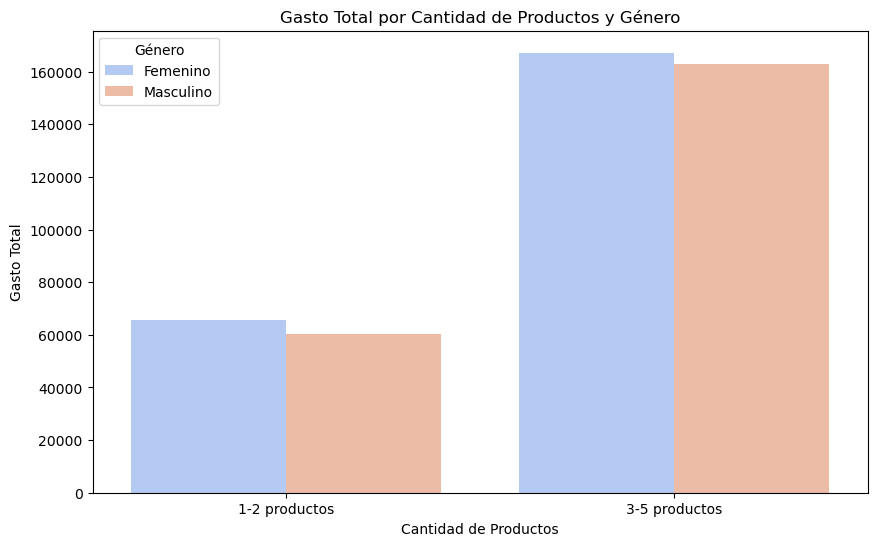

In [229]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cantidad de Productos', y='Importe total', hue='Género', data=gasto_por_cantidad_genero, palette='coolwarm')
plt.title('Gasto Total por Cantidad de Productos y Género')
plt.xlabel('Cantidad de Productos')
plt.ylabel('Gasto Total')
plt.show()

Basándonos en los tres gráficos, podemos confirmar la existencia de comportamientos 
distintos según la cantidad de productos adquiridos por transacción:

• Mayor gasto total:
  Las transacciones con una mayor cantidad de productos (3-5) generan un gasto total 
  significativamente superior.

• Mayor compra en todas las categorías:
  Cuando se compran más artículos, los clientes tienden a incluir más productos de 
  Belleza, Electrónica y especialmente Ropa en sus transacciones.

• Tendencia similar en ambos géneros:
  Tanto hombres como mujeres muestran un mayor gasto total en transacciones con más productos. 
  Las mujeres tienden a gastar ligeramente más en ambos tipos de transacciones.

# ¿Que información se puede extraer del análisis de precios dentro de cada categoría de producto?

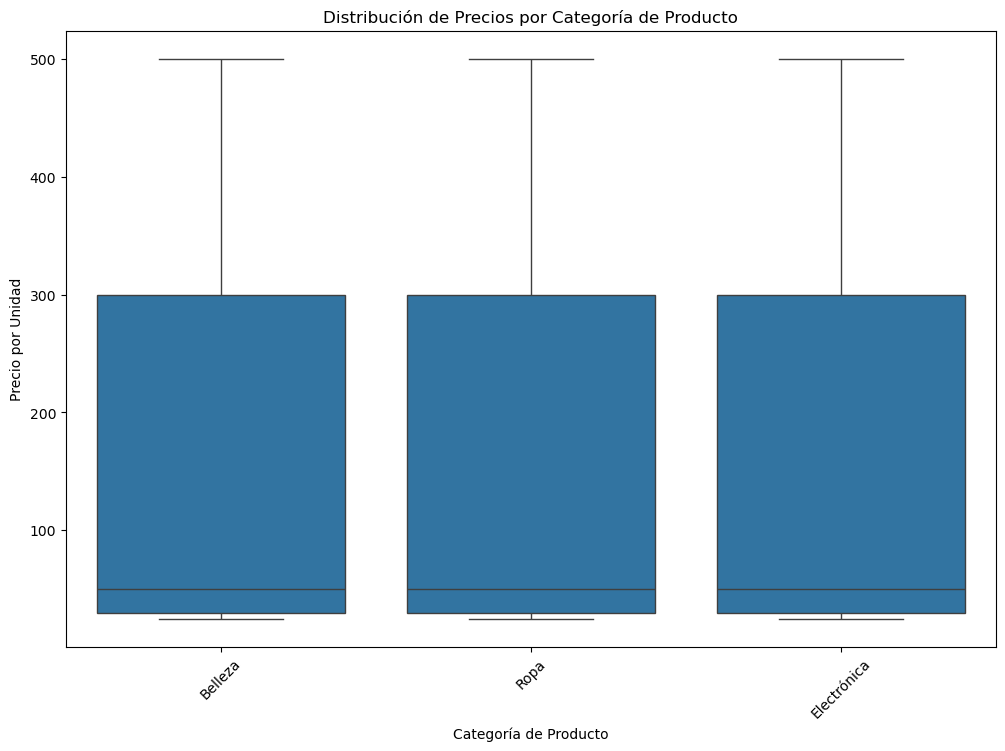

In [192]:
# Distribución de precios por categoría
plt.figure(figsize=(12, 8))
sns.boxplot(x='Categoría de producto', y='Precio por unidad', data=df)
plt.title('Distribución de Precios por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Precio por Unidad')
plt.xticks(rotation=45)
plt.show()

In [196]:
# Precio promedio por categoría
precio_promedio_categoria = df.groupby('Categoría de producto')['Precio por unidad'].mean().reset_index()
print(precio_promedio_categoria)

  Categoría de producto  Precio por unidad
0               Belleza         184.055375
1           Electrónica         181.900585
2                  Ropa         174.287749


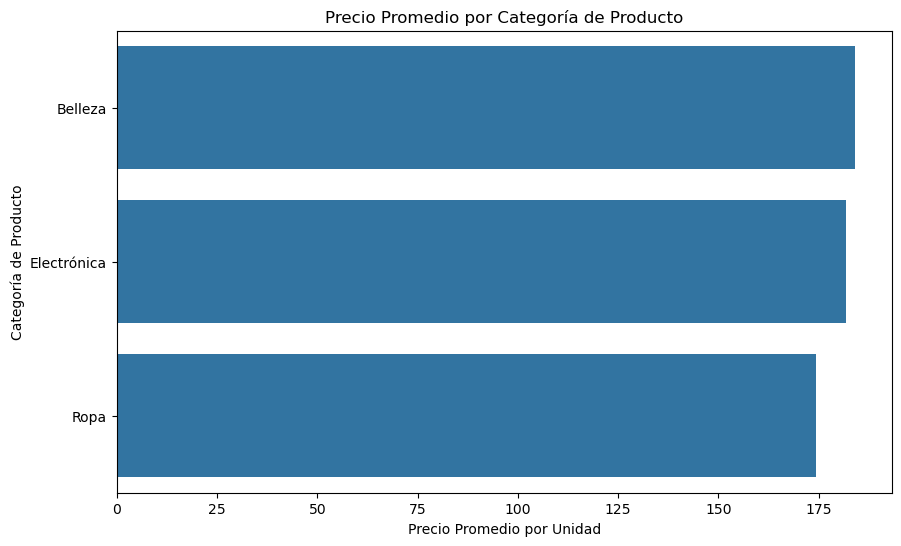

In [200]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Precio por unidad', y='Categoría de producto', data=precio_promedio_categoria)
plt.title('Precio Promedio por Categoría de Producto')
plt.xlabel('Precio Promedio por Unidad')
plt.ylabel('Categoría de Producto')
plt.show()

Información clave extraída del análisis de precios:

• Precios similares:
  Los precios más comunes de los productos son bastante similares entre Belleza, Ropa y Electrónica.

• Dispersión de precios comparable:
  La variabilidad de precios para la mayoría de los productos es parecida entre las tres categorías.

• Productos caros en todas las categorías:
  Hay productos mucho más caros en cada categoría, lo que aumenta el precio promedio.

• Precios promedio ligeramente diferentes:
  Aunque los precios más comunes son similares, los precios promedio son un poco más altos en Belleza y Electrónica que en Ropa. 
  Esto se debe a la influencia de los productos más caros en estas categorías.

# 3. CONCLUSIONES GENERALES

Comportamiento del Cliente por Demografía:
  - Los hombres tienden a gastar más que las mujeres en la mayoría de los grupos de edad.
  - El gasto es más alto en los grupos de 15-35 años, con una leve disminución en los grupos mayores.
  - Los hombres jóvenes muestran un gasto relativamente alto en comparación con las mujeres del mismo grupo.sto total más bajo.alta demanda.
"""

 Tendencias de Venta a lo Largo del Tiempo:
  - Las ventas muestran variabilidad estacional, con picos en mayo y diciembre y un valle en agosto.
  - El invierno registra el mayor gasto total, seguido por primavera y verano. El otoño tiene el menor gasto.

• Preferencia de Productos:
  - Electrónica y Ropa son las categorías con mayores ventas, seguidas por Belleza.
  - Los grupos jóvenes (20-39 años) prefieren gastar en Belleza y Ropa, mientras que los de 50-59 años se enfocan más en Electrónica.

• Comportamiento según la Cantidad de Productos por Transacción:
  - Las transacciones con más productos (3-5) generan un gasto mayor que aquellas con menos productos.
  - Tanto hombres como mujeres muestran un mayor gasto en transacciones con más productos.


• Análisis de Precios por Categoría de Producto:
  - Los precios típicos son similares entre las categorías, pero los productos de gama alta elevan los precios promedio.
  - Belleza y Electrónica tienen un precio promedio ligeramente superior al de Rop.
